<a href="https://colab.research.google.com/github/fsajad9/Deep_code/blob/main/Chapter1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
import matplotlib.pyplot as plt

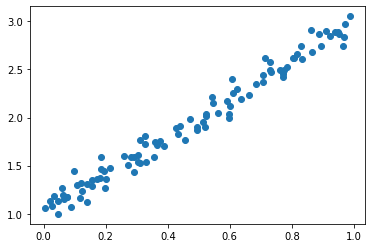

In [54]:
n=100
w_true=2
b_true=1
np.random.seed(42)
x=np.random.rand(n,1)
epsilon=np.random.randn(n,1)
y=w_true*x+b_true+.1*epsilon
plt.scatter(x,y)

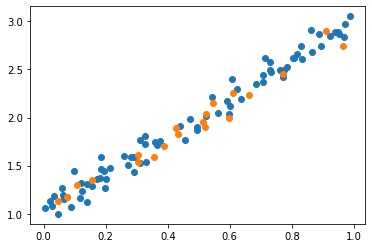

In [55]:
idx=np.arange(n)
np.random.shuffle(idx)
train_idx=idx[:int(.8*n)]
test_idx=idx[int(.8*n):]
x_train,y_train=x[train_idx],y[train_idx]
x_test,y_test=x[test_idx],y[test_idx]
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor=torch.as_tensor(x_train).float().to(device)
y_train_tensor=torch.as_tensor(y_train).float().to(device)



In [61]:
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.b=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.w=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x):
    return self.b+self.w*x
    

No handles with labels found to put in legend.


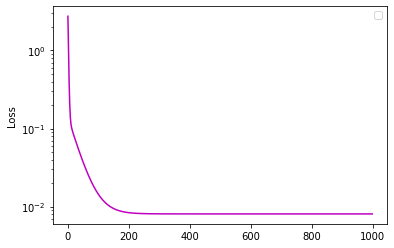

In [62]:
torch.manual_seed(42) 
lr=.1
model=ManualLinearRegression().to(device)
optimizer=optim.SGD(model.parameters(),lr=lr)
loss_fn=nn.MSELoss(reduction='mean')
n_epoch=1000
losses=[]
for epoch in range(n_epoch):
  model.train()
  yhat=model(x_train_tensor)
  loss=loss_fn(yhat,y_train_tensor)
  o=loss.item()
  losses.append(o)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
plt.plot(losses,'m')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend() 
